
#  Detailed Analysis of Google Playstore Apps Data

## <a href = 'https://www.kaggle.com/lava18/google-play-store-apps'> Download Dataset from kaggle </a> <a id = 'top'></a>

##  Questions Covered: 
- <a href = '#s1'> What is the range where most of the ratings lies? </a>
- <a href = '#s2'> Which is Most Expensive App? </a>
- <a href = '#s3'> Free vs Paid Stats. </a>
- <a href = '#s4'> Which Content Type apps are on playstore?</a>
- <a href = '#s5'> Which is the Highest Rated Category? </a>
- <a href = '#s6'> Which Category has highest number of Total Installs? </a>
- <a href = '#s7'> Which Category has highest number of average Installs? </a>
- <a href = '#s8'> Which Category has largest Total Price? </a>
- <a href = '#s9'> Which Category require large space on your phone? </a>
- <a href = '#s9'> Free vs Paid Category wise. </a>


# Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
playstore_data = pd.read_csv('googleplaystore.csv')
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Wrangling

In [3]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Fill missing rating with mean

In [5]:
playstore_data['Rating'] = playstore_data['Rating'].fillna(round(playstore_data['Rating'].mean(),1))
playstore_data.dropna(inplace = True)

In [6]:
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
playstore_data['Reviews'] = playstore_data['Reviews'].astype('int')

In [8]:
playstore_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [9]:
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: x.replace(',','') if ',' in x else x)
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: x.replace('+','') if '+' in x else x)
playstore_data['Installs'] = playstore_data['Installs'].astype(float)
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##  Converting size into same units

In [10]:
playstore_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
def convert_size_in_kb(x):
    if x == 'Varies with device':
        return np.NaN
    else:
        return x.replace('[A-za-z]','', regex = True)

In [12]:
playstore_data1 = playstore_data.replace({'Size': 'Varies with device'}, np.NaN)
playstore_data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
def size_convert_into_kb(x):
    if 'M' in str(x):
        return float(x[:-1])*1024
    elif 'k' in str(x):
        return float(x[:-1])
    else:
        return float(x)
    

In [14]:
playstore_data1['Size in kb'] = playstore_data1['Size'].apply(size_convert_into_kb)
playstore_data1.drop('Size', axis = 1, inplace =True)
playstore_data1.tail(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in kb
10838,Parkinson Exercices FR,MEDICAL,4.2,3,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9728.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,10000000.0,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,19456.0


In [15]:
playstore_data1['Size in kb'].fillna(playstore_data1['Size in kb'].mean(), inplace= True)

## Dealing with Price Column

In [16]:
playstore_data1.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
playstore_data1['Price in $'] = playstore_data1['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
playstore_data1['Price in $'] = playstore_data1['Price in $'].apply(lambda x : float(x))
playstore_data1.drop('Price', axis = 1, inplace = True)

In [18]:
playstore_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null int32
Installs          10829 non-null float64
Type              10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
Size in kb        10829 non-null float64
Price in $        10829 non-null float64
dtypes: float64(4), int32(1), object(8)
memory usage: 1.1+ MB


In [19]:
playstore_data1.describe()

,Rating,Reviews,Installs,Size in kb,Price in $
count,10829.000000,1.082900e+04,1.082900e+04,10829.000000,10829.000000
mean,4.192945,4.446018e+05,1.547990e+07,22051.425955,1.028091
std,0.479046,2.929213e+06,8.507114e+07,21249.533388,15.957778
min,1.000000,0.000000e+00,0.000000e+00,8.500000,0.000000
25%,4.100000,3.800000e+01,5.000000e+03,6041.600000,0.000000
50%,4.200000,2.100000e+03,1.000000e+05,18432.000000,0.000000
75%,4.500000,5.481500e+04,5.000000e+06,26624.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,102400.000000,400.000000


# Data Visualization and Analysis

In [20]:
playstore_data1.head(3)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in kb,Price in $
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8,0.0


<a id = 's1'></a>
# Rating Distribution
<a href = '#top'>Back on Top</a>

In [21]:
print('Avg. Rating:',round(playstore_data1.Rating.mean(),1))

Avg. Rating: 4.2


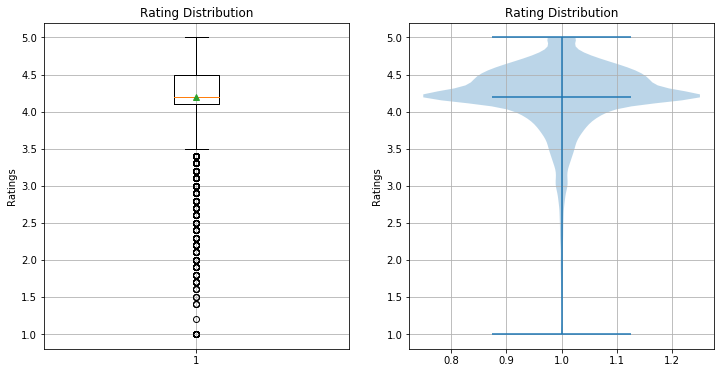

In [22]:
fig,ax = plt.subplots(1,2, figsize= (12,6))

ax[0].boxplot(playstore_data1.Rating, showmeans=True )
ax[0].grid()
ax[0].set_title('Rating Distribution')
ax[0].set_ylabel('Ratings')
ax[1].violinplot(playstore_data1.Rating, showmeans=True)
ax[1].set_title('Rating Distribution')
ax[1].set_ylabel('Ratings')
ax[1].grid()
plt.show()
fig.savefig('Rating Distribution')

# <font color = 'green'> 50% of the Ratings lie between `4.1 - 4.5` with average Rating of `4.2` </font>

<a id = 's2'></a>
# Most Expensive App           
<a href = '#top'> Back on  Top </a>
                                                                                        

In [23]:
playstore_data1[playstore_data1['Price in $'] == playstore_data1['Price in $'].max()]

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in kb,Price in $
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,10000.0,Paid,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7475.2,400.0


# <font color = 'green'> `I'm Rich - Trump Edition` is the Most Expensive App with a Price of `400 $` </font>

<a id = 's3'></a>
# Free vs Paid Stats
<a href = '#top'>Back on Top</a>

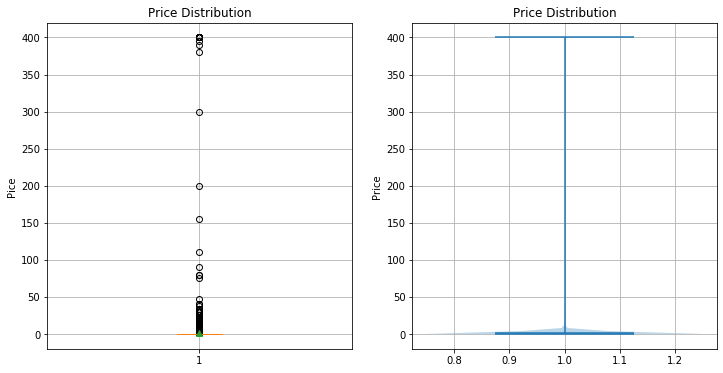

In [24]:
fig,ax = plt.subplots(1,2, figsize= (12,6))

ax[0].boxplot(playstore_data1['Price in $'], showmeans=True )
ax[0].grid()
ax[0].set_title('Price Distribution')
ax[0].set_ylabel('Pice')
ax[1].violinplot(playstore_data1['Price in $'], showmeans=True)
ax[1].set_title('Price Distribution')
ax[1].set_ylabel('Price')
ax[1].grid()
plt.show()
fig.savefig('Price Distribution')

In [25]:
playstore_data1.Type.value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

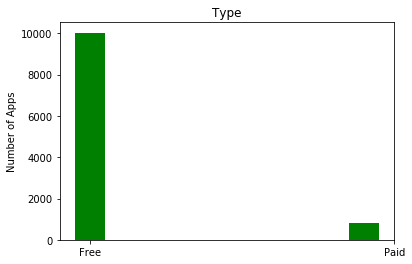

In [26]:
plt.hist(playstore_data1.Type, color = 'green', align = 'left' )
plt.title('Type')
plt.ylabel('Number of Apps')
plt.show()

In [27]:
free_perc = round(((playstore_data1['Type'] == 'Free').sum()/playstore_data1.shape[0])*100,1)
paid_perc = round(((playstore_data1['Type'] == 'Paid').sum()/playstore_data1.shape[0])*100,1)

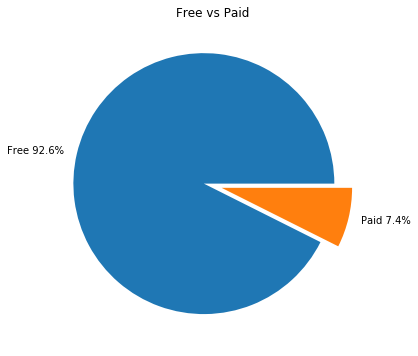

In [28]:
fig = plt.figure(figsize =(10,6))
plt.pie([free_perc,paid_perc], labels = ('Free {}%'.format(free_perc),'Paid {}%'.format(paid_perc)), explode = (0.07,0.07))
plt.title('Free vs Paid')
plt.show()
fig.savefig('Free vs Paid')

# <font color = 'green'> `92.6%` of Apps are `Free` on Playstore and only `7.4%` are `Paid`

<a id = 's4'></a>
# Number of Apps according to Content Type
<a href = '#top'>Back on Top</a>

In [29]:
playstore_data1['Content Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

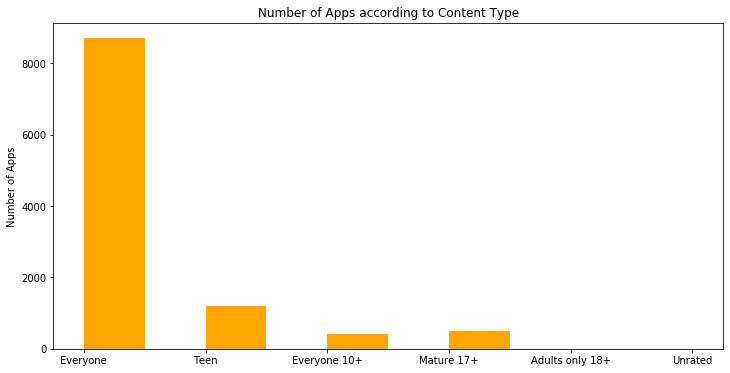

In [30]:
fig = plt.figure(figsize = (12,6))
plt.hist(playstore_data1['Content Rating'], color = 'orange')
plt.title('Number of Apps according to Content Type')
plt.ylabel('Number of Apps')
plt.show()
fig.savefig('Number of Apps according to Content Type')

# <font color = 'green'> Most number of Apps are for `Everyone's` use and only `5` apps belongs to Adult and unrated types.

# Category wise Analysis

In [31]:
category_group = playstore_data1.groupby('Category')
categories = playstore_data1.Category.unique()

<a id='s5'></a>
# Highest Rated Category
<a href = '#top'> Back on Top</a>

In [32]:
rating = pd.DataFrame(round(category_group['Rating'].mean(),2).sort_values(ascending = False))

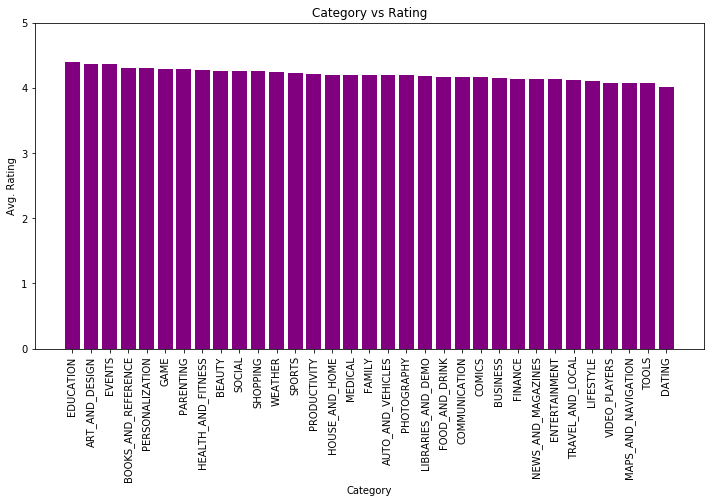

In [33]:
fig = plt.figure(figsize = (12,6))
plt.bar(rating.index, rating['Rating'], color = 'purple')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Avg. Rating')
plt.yticks(range(0,6,1))
plt.title('Category vs Rating')
plt.show()
fig.savefig('Category vs Rating')

# <font color = 'green'> `Education` Rated Highest among all the categories.

<a id = 's6'></a>
# Category with Highest number of Total Installs
<a href = '#top'> Back on Top</a>

In [34]:
total_installs = pd.DataFrame(category_group['Installs'].sum().sort_values()/1000000)

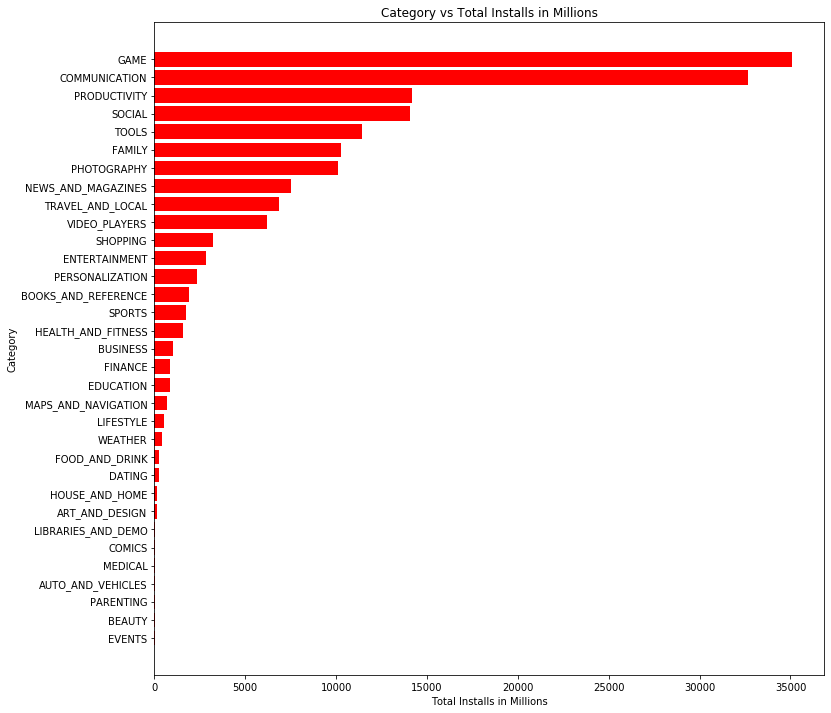

In [35]:
fig = plt.figure(figsize = (12,12))
plt.barh(total_installs.index, total_installs['Installs'], color = 'red')
plt.ylabel('Category')
plt.xlabel('Total Installs in Millions')
plt.title('Category vs Total Installs in Millions')
plt.show()
fig.savefig('Category vs Total Installs in Millions')

# <font color = 'green'> As Expected `Games` have highest number of Total Installs.

<a id = 's7'></a>
# Category with Highest number of avg Installs 
<a href = '#top'> Back on Top</a>

In [36]:
avg_installs = pd.DataFrame(category_group['Installs'].mean().sort_values()/1000000)

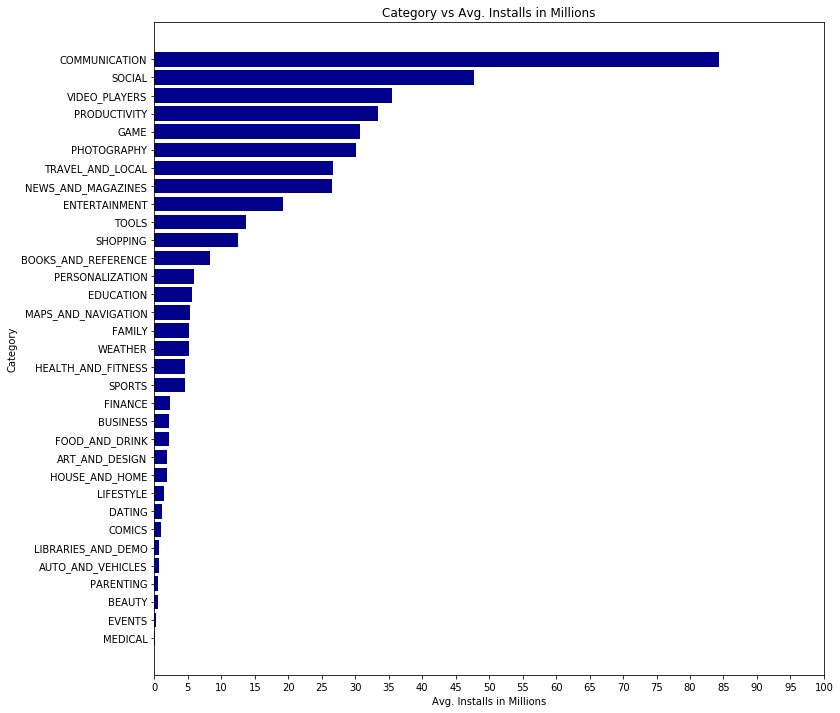

In [37]:
fig = plt.figure(figsize = (12,12))
plt.barh(avg_installs.index, avg_installs['Installs'], color = 'darkblue')
plt.ylabel('Category')
plt.xlabel('Avg. Installs in Millions')
plt.xticks(range(0,101,5))
plt.title('Category vs Avg. Installs in Millions')
plt.show()
fig.savefig('Category vs Avg Installs in Millions')

# <font color = 'green'> Although Games have highest installs but `Communication` Category  have highest avg. installs

<a id = 's8'></a>
# Category with Highest Total Price 
<a href = '#top'> Back on the Top</a>

In [38]:
price = pd.DataFrame(category_group['Price in $'].sum().sort_values())

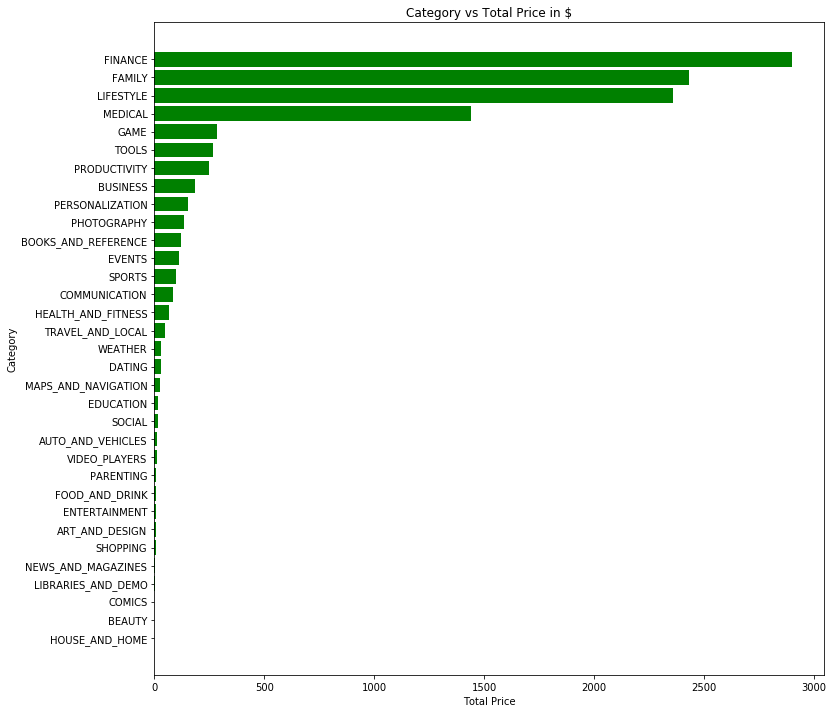

In [39]:
fig = plt.figure(figsize = (12,12))
plt.barh(price.index, price['Price in $'], color = 'green')
plt.ylabel('Category')
plt.xlabel('Total Price')
plt.title('Category vs Total Price in $')
plt.show()
fig.savefig('ategory vs Total Price in $')

# <font color = 'green'> `Finance` category apps have Highest Total Price

<a id = 's9'></a>
# Category which Consumes Large size on your phone
<a href = '#top'> Back on Top</a>

In [40]:
size = pd.DataFrame((category_group['Size in kb'].mean())/1024)

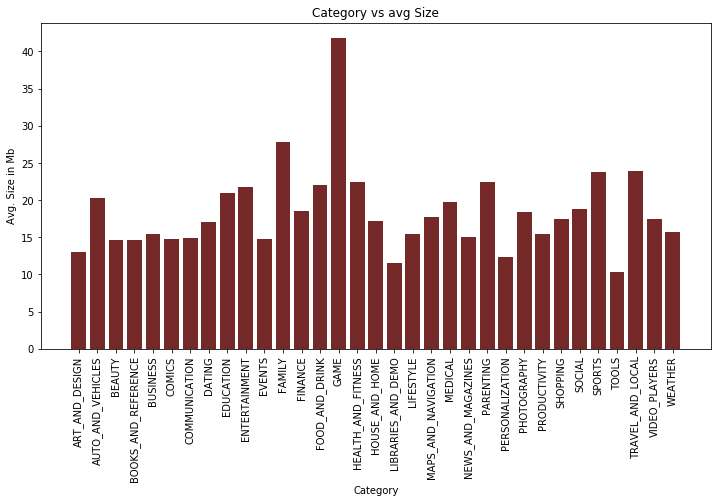

In [41]:
fig = plt.figure(figsize = (12,6))
plt.bar(size.index, size['Size in kb'], color = '#752828')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Avg. Size in Mb')
plt.title('Category vs avg Size')
plt.show()
fig.savefig('Category vs avg Size')

# <font color = 'green'> On an avg. `Games` consumes larger space on your phone.

<a id = 's10'></a>
# Free vs Paid Category wise
<a href = '#top'> Back on Top</a>

In [42]:
type_group = playstore_data1.groupby('Type')

In [43]:
free_group = type_group.get_group('Free').groupby('Category')
free_perc = round((free_group.size()/category_group.size())*100,1)

In [44]:
paid_group = type_group.get_group('Paid').groupby('Category')
paid_perc = round((paid_group.size()/category_group.size())*100,1)

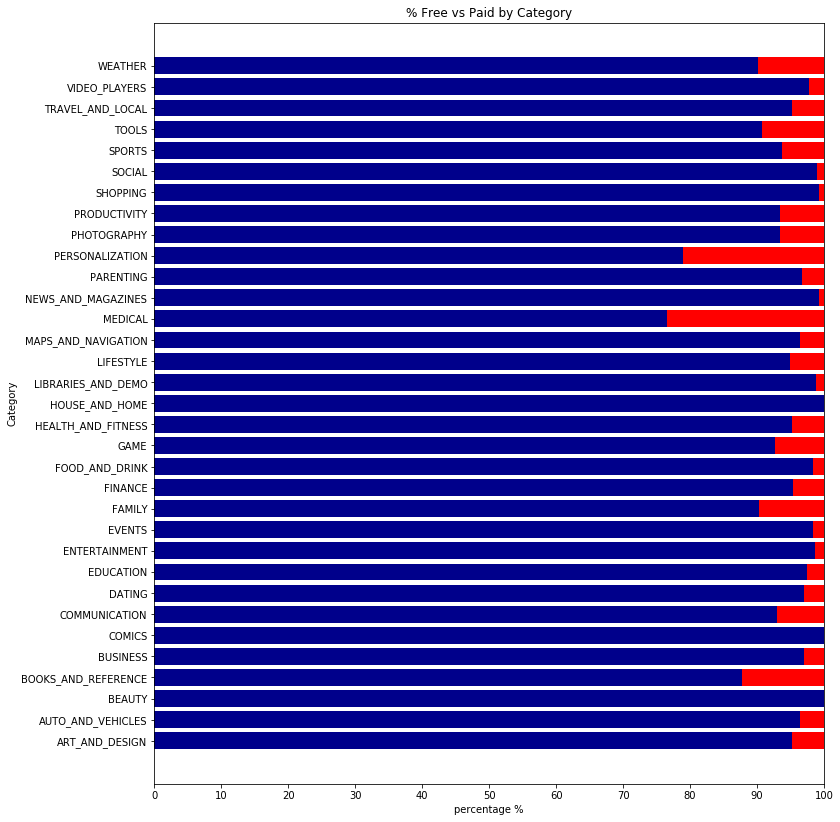

In [45]:
fig = plt.figure(figsize = (12,14))
plt.barh(free_perc.index, free_perc, color = 'DarkBlue')
plt.barh(free_perc.index, paid_perc, left =free_perc, color = 'r')
plt.xlabel('percentage %')
plt.xticks(range(0,110,10))
plt.ylabel('Category')
plt.title('% Free vs Paid by Category')
plt.show()
fig.savefig('% Free vs Paid by Category')

# Analysis by: <a href = 'https://www.linkedin.com/in/gaurav2022/'> Gaurav Jain </a>

<a href = '#top'> Back on Top </a>